<a href="https://colab.research.google.com/github/PrabaKDataScience/DeepLearning/blob/main/NLP/Basics/03_tokenisation_with_spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic

In [1]:
import spacy

In [2]:
nlp = spacy.blank('en')
test_str = "Dr. Xxxxx wants to have rice for the dinner which costs $100 in USA."
doc= nlp(test_str)

In [3]:
for each in doc:
  print(each)

Dr.
Xxxxx
wants
to
have
rice
for
the
dinner
which
costs
$
100
in
USA
.


In [4]:
test_str_2 =  '''
"Let's go to N.Y.!"
'''

doc_2 = nlp(test_str_2)

for each in doc_2:
  print(each)



"
Let
's
go
to
N.Y.
!
"




## Exercise :1 

(1) Think stats is a free book to study statistics (https://greenteapress.com/thinkstats2/thinkstats2.pdf)

This book has references to many websites from where you can download free datasets. You are an NLP engineer working for some company and you want to collect all dataset websites from this book. To keep exercise simple you are given a paragraph from this book and you want to grab all urls from this paragraph using spacy

In [5]:
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

import spacy
nlp = spacy.blank('en')

doc  = nlp(text)

for each in doc:
  if each.like_url:
    print(each.text)

http://www.data.gov/
http://www.science
http://data.gov.uk/.
http://www3.norc.org/gss+website/
http://www.europeansocialsurvey.org/.


## Excericise No  :2

(2) Extract all money transaction from below sentence along with currency. Output should be,

two $

500 €

In [6]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

doc_2 = nlp(transactions)

for token in doc_2:
  if token.like_num and doc_2[token.i+1].is_currency:
    print(token.text , doc_2[token.i+1].text)

two $
500 €


# NLP Pipeline in Spacy

In [7]:
# When we load spacy.balnk it is having empty pipeline

nlp  = spacy.blank('en')
nlp.pipeline

[]

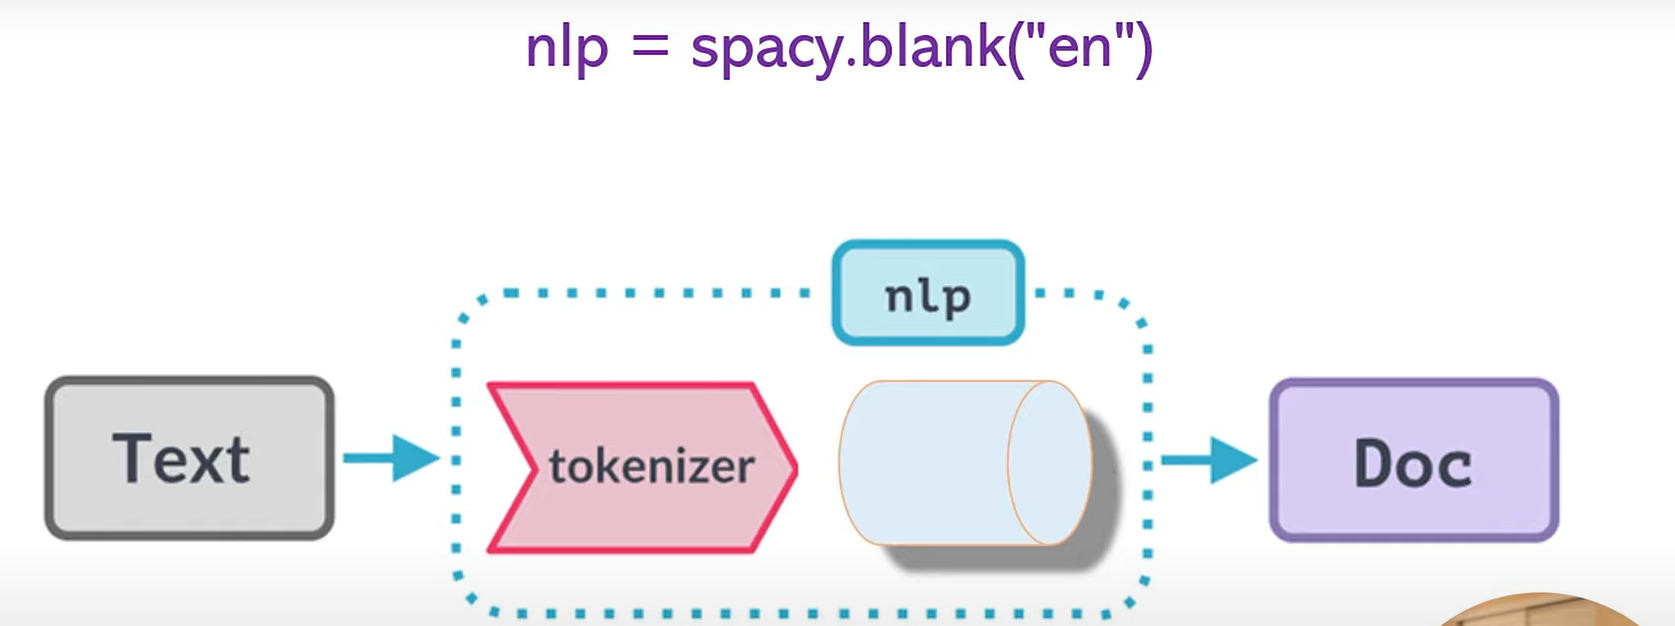

> Though the spacy blank doesnt provide any pipeline, it comes with tokeniser , thats why we can able to get tokens out of any sequence we are feeding (Forget about the accuracy of the token)

In [8]:
#Loading a pretrained pipeline 

# It has lemmatizer , tagger , parser, ner(name entity recogniser) tok2vec)

nlp = spacy.load("en_core_web_sm")
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f0da04f72f0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f0da04f7280>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f0da03900d0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f0da0169b90>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f0da01752d0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f0da03905d0>)]

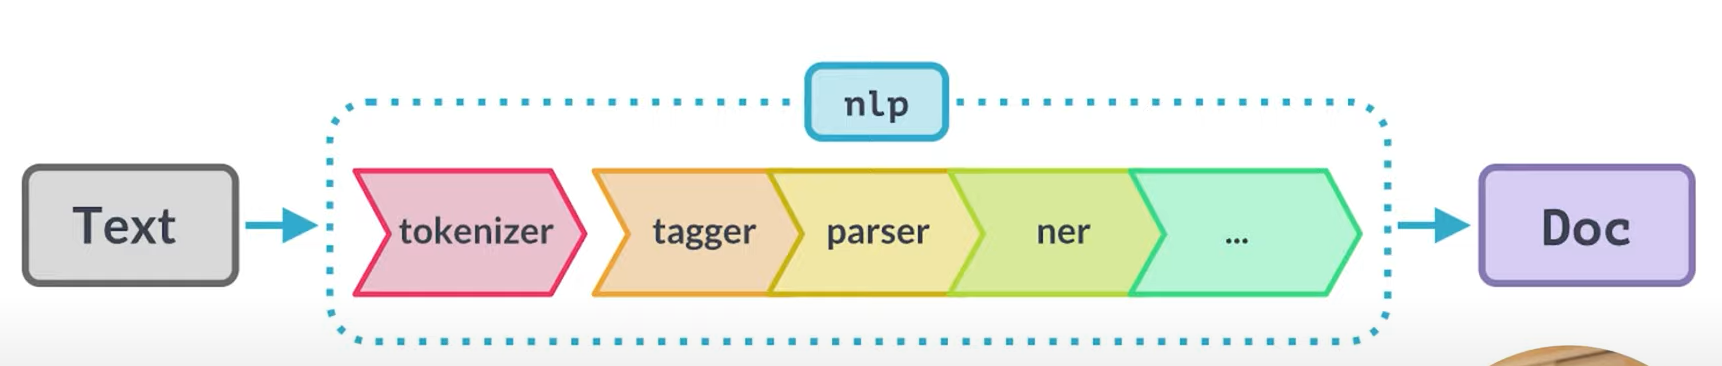

In [9]:
doc = nlp ("Captain America ate 100$ of samos . Then he said I can do this all day.")

for token in doc:
  print(token , " | ", token.pos_ , " | ", token.lemma_)

# pos - parts of speech --> It is a result of having tagger in the pipeline
# lemma - base word of any word -- > It is a result of Lematizer inn the pipeline

Captain  |  PROPN  |  Captain
America  |  PROPN  |  America
ate  |  VERB  |  eat
100  |  NUM  |  100
$  |  NOUN  |  $
of  |  ADP  |  of
samos  |  NOUN  |  samos
.  |  PUNCT  |  .
Then  |  ADV  |  then
he  |  PRON  |  he
said  |  VERB  |  say
I  |  PRON  |  I
can  |  AUX  |  can
do  |  VERB  |  do
this  |  PRON  |  this
all  |  DET  |  all
day  |  NOUN  |  day
.  |  PUNCT  |  .


In [10]:
doc = nlp ("Tesla Inc is going to acquire twitter for $45 billion")

for each in doc.ents:
  print(each , ' | ', each.label_ , ' | ', spacy.explain(each.label_))

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


In [11]:
from spacy import displacy

displacy.render(doc, style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">\n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Tesla Inc\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n is going to acquire twitter for \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    $45 billion\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">MONEY</span>\n</mark>\n</div>'

You will get like this , if you run in Jupyter notebook , in google colab html render is not available

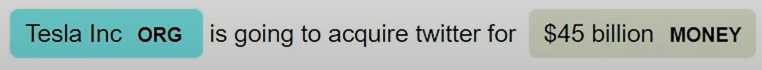

In [17]:
text =  "Bloomberg founded a company called Bloomberg"

doc = nlp(text)

for ent in doc.ents:
  print(ent , '==>', ent.label_ )

Bloomberg ==> PERSON
Bloomberg ==> ORG


## How to get component from one model to other model
  Adding ner from other model to blank model



In [23]:
source_nlp = spacy.blank('en')

pretrained = spacy.load('en_core_web_sm')

source_nlp.add_pipe("ner", source = pretrained)

print ('Copied : ', source_nlp.pipeline)

print('Original : ', pretrained.pipeline[-1])


Copied :  [('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7f0d97ef46d0>)]
Original :  ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7f0d97ef46d0>)


# Stemming & Lemmatizer



*   To get the base word of any word
*   Stemming - Using simple rules to get base word 
*   Lemmatize - Using the grammar to get base word

>  ✨**Note** : Stemming is not supported by spacy but NLTK supports both stemming and lemmatizing



In [24]:
import spacy 
import nltk


In [30]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ['eating','eats','eat','ate','adjustable','rafting','ability','meeting']

for word in words:

  print(word ,  '|', stemmer.stem(word))

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


In [31]:
nlp = spacy.load('en_core_web_sm')
doc =nlp(" ".join(words))

for token in doc:
  print(token ,  "|", token.lemma_)

eating | eating
eats | eat
eat | eat
ate | eat
adjustable | adjustable
rafting | raft
ability | ability
meeting | meeting


## Customize the lemma

In [34]:
doc = nlp ("Bro, you wanna go? Brah, Don't say no")

for token in doc:
  print(token , '-->', token.lemma_)

Bro --> Bro
, --> ,
you --> you
wanna --> wanna
go --> go
? --> ?
Brah --> Brah
, --> ,
Do --> do
n't --> not
say --> say
no --> no


In [35]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f0d928b0f30>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f0d928b09f0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f0d928b4750>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f0d926e0190>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f0d92849eb0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f0d926cdf50>)]

In [36]:
# Attributeruler is driving the lemmatizer 
# To map the word Bro to Brother , we should take control on it 

ar = nlp.get_pipe('attribute_ruler')

ar.add([[{'Text':'Bro'}],[{'Text':'Brah'}]],{'LEMMA':'Brother'})


In [38]:
doc = nlp ("Bro, you wanna go? Brah, Don't say no")

for token in doc:
  print(token , '-->', token.lemma_)

Bro --> Brother
, --> ,
you --> you
wanna --> wanna
go --> go
? --> ?
Brah --> Brother
, --> ,
Do --> do
n't --> not
say --> say
no --> no


## Exercise 1:

Convert these list of words into base form using Stemming and Lemmatization and observe the transformations
Write a short note on the words that have different base words using stemming and Lemmatization

In [39]:
#using stemming in nltk
lst_words = ['running', 'painting', 'walking', 'dressing', 'likely', 'children', 'whom', 'good', 'ate', 'fishing']

In [44]:
#SOlution :

import nltk 
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed = [stemmer.stem(i) for i in lst_words]

for each_i , each_j in zip(lst_words, stemmed):
  print(each_i , '==>', each_j)

running ==> run
painting ==> paint
walking ==> walk
dressing ==> dress
likely ==> like
children ==> children
whom ==> whom
good ==> good
ate ==> ate
fishing ==> fish


In [64]:
# Lemmatization :
#using lemmatization in spacy

doc = nlp("running painting walking dressing likely children whom good ate fishing")
for token in doc:
    print(token, " | ", token.lemma_)

running  |  run
painting  |  painting
walking  |  walking
dressing  |  dress
likely  |  likely
children  |  child
whom  |  whom
good  |  good
ate  |  ate
fishing  |  fishing


##### **Observations**

Words that are different in stemming and lemmatization are:


1.   painting
2.   likely
3. children
4. ate
5. fishing

As Stemming achieves the base word by removing the suffixes [ing, ly etc], so it successfully transform the words like 'painting', 'likely', 'fishing' and lemmatization fails for some words ending with suffixes here.

As Lemmatization uses the dictionary meanings while converting to the base form, so words like 'children' and 'ate' are successfully transformed and stemming fails here.

## Excercise 2 : 

convert the given text into it's base form using both stemming and lemmatization

In [54]:
text = """Latha is very multi talented girl.She is good at many skills like dancing, running, singing, playing.She also likes eating Pav Bhagi. she has a 
habit of fishing and swimming too.Besides all this, she is a wonderful at cooking too.
"""

### Using NLTK

In [62]:
# Solution : 

import nltk

# Uncoment if required 

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

tokenized = word_tokenize(text)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

res = []
for token in tokenized:
  #print(token)
  stemmed = stemmer.stem(token)
  lemma = lemmatizer.lemmatize(stemmed)
  res.append(lemma)

print('Original Sentence : ', text ,'\n') 

print('Reduced form : ', ' '.join(res))


Original Sentence :  Latha is very multi talented girl.She is good at many skills like dancing, running, singing, playing.She also likes eating Pav Bhagi. she has a 
habit of fishing and swimming too.Besides all this, she is a wonderful at cooking too.
 

reduced form :  latha is veri multi talent girl.sh is good at mani skill like danc , run , sing , playing.sh also like eat pav bhagi . she ha a habit of fish and swim too.besid all thi , she is a wonder at cook too .


### Using Spacy

In [63]:
import spacy 
nlp = spacy.load('en_core_web_sm')

doc = nlp(text)

res = []
for token in doc:
  res.append(token.lemma_)

print('Original Sentence : ', text ,'\n') 

print('Reduced form : ', ' '.join(res))

Original Sentence :  Latha is very multi talented girl.She is good at many skills like dancing, running, singing, playing.She also likes eating Pav Bhagi. she has a 
habit of fishing and swimming too.Besides all this, she is a wonderful at cooking too.
 

reduced form :  Latha be very multi talented girl . she be good at many skill like dancing , running , singing , play . she also like eat Pav Bhagi . she have a 
 habit of fishing and swim too . besides all this , she be a wonderful at cook too . 



# POS (Parts of Speech)

Ref : https://spacy.io/usage/linguistic-features

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop, sep =' | ')

Apple | Apple | PROPN | NNP | nsubj | Xxxxx | True | False
is | be | AUX | VBZ | aux | xx | True | True
looking | look | VERB | VBG | ROOT | xxxx | True | False
at | at | ADP | IN | prep | xx | True | True
buying | buy | VERB | VBG | pcomp | xxxx | True | False
U.K. | U.K. | PROPN | NNP | dobj | X.X. | False | False
startup | startup | NOUN | NN | dobj | xxxx | True | False
for | for | ADP | IN | prep | xxx | True | True
$ | $ | SYM | $ | quantmod | $ | False | False
1 | 1 | NUM | CD | compound | d | False | False
billion | billion | NUM | CD | pobj | xxxx | True | False


In [10]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.pos_, spacy.explain(token.pos_),sep=" || ")

Apple || PROPN || proper noun
is || AUX || auxiliary
looking || VERB || verb
at || ADP || adposition
buying || VERB || verb
U.K. || PROPN || proper noun
startup || NOUN || noun
for || ADP || adposition
$ || SYM || symbol
1 || NUM || numeral
billion || NUM || numeral


## Exercise 1: 

In [14]:
!wget https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/7_pos/news_story.txt

--2022-11-01 11:03:38--  https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/7_pos/news_story.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1730 (1.7K) [text/plain]
Saving to: ‘news_story.txt’

news_story.txt      100%[===================>]   1.69K  --.-KB/s    in 0s      

2022-11-01 11:03:39 (18.9 MB/s) - ‘news_story.txt’ saved [1730/1730]



In [46]:
with open('news_story.txt', mode='r') as f:
  text = f.readlines()

text

['Inflation rose again in April, continuing a climb that has pushed consumers to the brink and is threatening the economic expansion, the Bureau of Labor Statistics reported Wednesday.\n',
 '\n',
 'The consumer price index, a broad-based measure of prices for goods and services, increased 8.3% from a year ago, higher than the Dow Jones estimate for an 8.1% gain. That represented a slight ease from March’s peak but was still close to the highest level since the summer of 1982.\n',
 '\n',
 'Removing volatile food and energy prices, so-called core CPI still rose 6.2%, against expectations for a 6% gain, clouding hopes that inflation had peaked in March.\n',
 '\n',
 'The month-over-month gains also were higher than expectations — 0.3% on headline CPI versus the 0.2% estimate and a 0.6% increase for core, against the outlook for a 0.4% gain.\n',
 '\n',
 'The price gains also meant that workers continued to lose ground. Real wages adjusted for inflation decreased 0.1% on the month despite a 

In [47]:
import spacy 
nlp = spacy.load('en_core_web_sm')
text = ' '.join(text)
doc = nlp(text)
nouns = []
nums = []
for token in doc:
  if token.pos_ in ('PROPN','NOUN') :
    # print(token , token.pos_, sep = ' | ')
    nouns.append(token)
    pass

  elif token.pos_ =='NUM':
    #print(token , token.pos_, sep = ' | ')
    nums.append(token)
    pass

pos_count = doc.count_by(spacy.attrs.POS)
print(len(nouns) , len(nums))

112 19


In [48]:
for key, val in pos_count.items():
  print(doc.vocab[key].text, val, sep=' | ')

NOUN | 95
VERB | 27
ADV | 15
ADP | 39
PROPN | 17
PUNCT | 32
DET | 34
PRON | 4
AUX | 13
CCONJ | 10
ADJ | 23
SPACE | 7
NUM | 19
PART | 4
SCONJ | 8
X | 1


#NER (NAMED ENTITY RECOGNISER)

Ref : https://spacy.io/api/entityrecognizer

In [49]:
import spacy 
nlp = spacy.load('en_core_web_sm')

In [52]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [53]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f8e58a7b910>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f8e58a7bad0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f8e5596a6d0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f8e5f62dfa0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f8e5757b2d0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f8e5c37b4d0>)]

In [55]:
text = '''Tesla, Inc. (/ˈtɛslə/ TESS-lə or /ˈtɛzlə/ TEZ-lə[b]) is an American multinational automotive and clean energy company headquartered in Austin, Texas. Tesla designs and manufactures electric vehicles (electric cars and trucks), battery energy storage from home to grid-scale, solar panels and solar roof tiles, and related products and services. Tesla is one of the world's most valuable companies and remains the world's most valuable automaker with a market capitalization of more than US$840 billion. '''
doc  = nlp(text)
for entity in doc.ents:
  print(entity , entity.label_, spacy.explain(entity.label_), sep = ' | ')


Tesla, Inc. | ORG | Companies, agencies, institutions, etc.
TEZ | ORG | Companies, agencies, institutions, etc.
American | NORP | Nationalities or religious or political groups
Austin | GPE | Countries, cities, states
Texas | GPE | Countries, cities, states
more than US$840 billion | MONEY | Monetary values, including unit


In [56]:
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [68]:
doc = nlp("Tesla is going to acquire Twitter for $45 billion.")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

Twitter  |  PERSON
$45 billion  |  MONEY


In [69]:
s = doc[2:5]
s

going to acquire

In [70]:
type(s)

spacy.tokens.span.Span

In [71]:
from spacy.tokens import Span

s1 = Span(doc, 0, 1, label="ORG")
s2 = Span(doc, 5, 6, label="ORG")

doc.set_ents([s1, s2], default="unmodified")

In [72]:
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

Tesla  |  ORG
Twitter  |  ORG
$45 billion  |  MONEY


## Exercise 1:

In [78]:
# Extract all the Geographical (cities, Countries, states) names from a given text
text = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""

# Solution
doc = nlp(text)
places = []
for ent in doc.ents:
  # print(ent , ent.label_)
  if ent.label_ is "GPE":
    places.append(ent.text)
places


['India', 'Delhi', 'Gujarat', 'Tamilnadu', 'Andhrapradesh', 'Bihar']

## Execcise 2 :


In [81]:
#Extract all the birth dates of cricketers in the given Text

text = """Sachin Tendulkar was born on 24 April 1973, Virat Kholi was born on 5 November 1988, Dhoni was born on 7 July 1981
and finally Ricky ponting was born on 19 December 1974."""
dates =[]
doc = nlp(text)
for ent in doc.ents:
  # print(ent , ent.label_)
  if ent.label_ is "DATE":
    dates.append(ent.text)
dates

['24 April 1973', '5 November 1988', '7 July 1981', '19 December 1974']